In [1]:
!pip install "numpy<=1.24" --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.0 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have

In [1]:
#importar las herramientas de cálculo y de gráficos que usamos
import plotly.graph_objs as go #librería para hacer dibujos
import pandas as pd #importar excel
import matplotlib.pyplot as plt #otra librería para hacer dibujos
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA #las librerías de estadística de python

In [2]:
!pip install pmdarima #instalar arima automático (basado en dificultades para encontrar parámetros ARIMA)
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.8 MB/s eta 0:00:00


# No estacional

In [3]:
!wget -O data.xlsx "https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/visitasAustralia.xlsx"
df = pd.read_excel('data.xlsx') #descargar archivo de excel


--2025-03-20 17:11:54--  https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/visitasAustralia.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/visitasAustralia.xlsx [following]
--2025-03-20 17:11:54--  https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/visitasAustralia.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11438 (11K) [application/octet-stream]
Saving to: ‘data.xlsx’

data.xlsx           100%[===================>]  11.17K  --.-KB/s    in 0.001s  

2025-03-20 17:11:54 (14.1 MB/s) -

In [4]:
print(df)

    índice   año     valor
0        0  1980  0.829894
1        1  1981  0.859511
2        2  1982  0.876689
3        3  1983  0.866707
4        4  1984  0.932052
5        5  1985  1.048260
6        6  1986  1.311190
7        7  1987  1.637560
8        8  1988  2.064110
9        9  1989  1.912680
10      10  1990  2.035450
11      11  1991  2.177210
12      12  1992  2.389680
13      13  1993  2.750590
14      14  1994  3.090670
15      15  1995  3.426640
16      16  1996  3.830650
17      17  1997  3.971910
18      18  1998  3.831600
19      19  1999  4.143100
20      20  2000  4.566550
21      21  2001  4.475410
22      22  2002  4.462800
23      23  2003  4.384830
24      24  2004  4.796860
25      25  2005  5.015050
26      26  2006  5.063440
27      27  2007  5.145490
28      28  2008  5.099440
29      29  2009  5.088170
30      30  2010  5.353700
31      31  2011  5.343330
32      32  2012  5.589160
33      33  2013  5.904880
34      34  2014  6.357180
35      35  2015  6.858950


In [5]:
#gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['valor'], mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

In [6]:
df['valor_diff'] = df['valor'].diff(1)

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['valor_diff'], mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

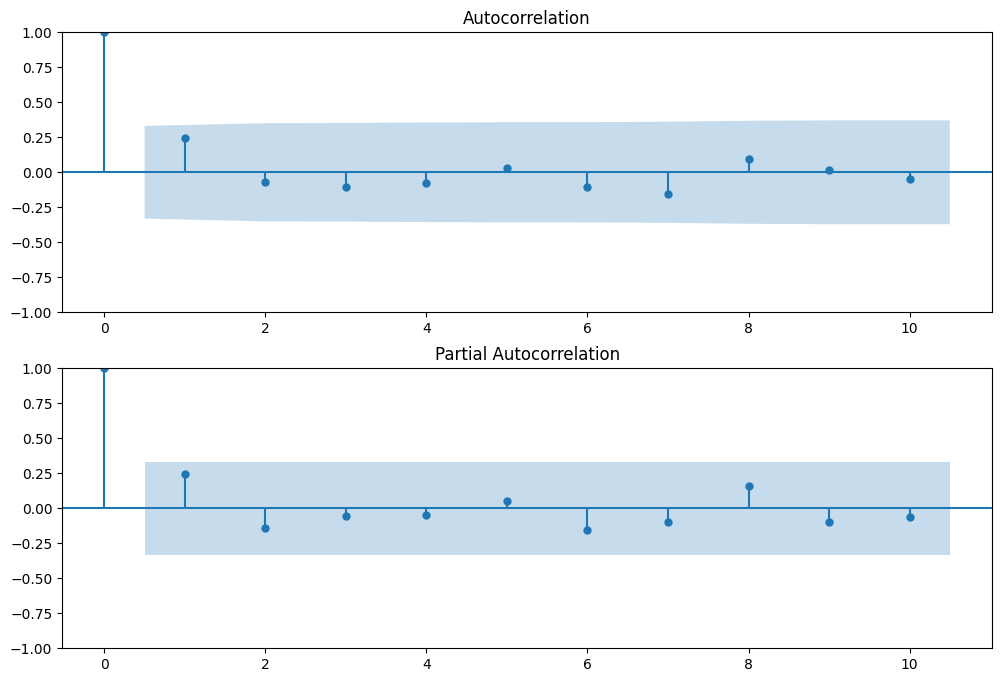

In [8]:
df2 = df.copy()
df2 = df2.dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['valor_diff'], lags=10, ax=ax1) #plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['valor_diff'], lags=10, ax=ax2) #plot de autocorrelación parcial

In [9]:
#hacemos diferencia. (diferencia 1, sólo en el componente mes a mes)
arimaModel1 = ARIMA(df['valor'], order=(0, 1, 0)).fit()
#arimaModel1, información de los parámetros y nos indica los residuos (la parte no explicada) del modelo

In [10]:
print(arimaModel1.summary())

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                   36
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  -1.621
Date:                Thu, 20 Mar 2025   AIC                              5.243
Time:                        17:12:00   BIC                              6.798
Sample:                             0   HQIC                             5.780
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0642      0.020      3.260      0.001       0.026       0.103
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.13   Pr

In [11]:
print(arimaModel1.forecast(3))

36    6.85895
37    6.85895
38    6.85895
Name: predicted_mean, dtype: float64


In [12]:
#hacemos diferencia. (diferencia 1, sólo en el componente mes a mes)
arimaModel1 = ARIMA(df['valor'], order=(0, 1, 0),trend='t').fit()
print(arimaModel1.summary())
#arimaModel1, información de los parámetros y nos indica los residuos (la parte no explicada) del modelo

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                   36
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   9.225
Date:                Thu, 20 Mar 2025   AIC                            -14.450
Time:                        17:12:00   BIC                            -11.340
Sample:                             0   HQIC                           -13.377
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1723      0.031      5.482      0.000       0.111       0.234
sigma2         0.0346      0.013      2.600      0.009       0.009       0.061
Ljung-Box (L1) (Q):                   2.30   Jarque-

In [13]:
#creamos marcas a futuro
futuro=list(range(36,38))

fig = go.Figure()
fig.add_trace(go.Scatter(y=df['valor'], mode='lines+markers', line=dict(color='black'), name='Serie'))
fig.add_trace(go.Scatter(x=futuro,y=arimaModel1.forecast(3), mode='lines+markers', line=dict(color='blue'), name='Pronóstico'))

fig.show()


In [14]:
#eliminar warning
import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")

#verifiquemos
auto_arima_model = auto_arima(df['valor'], seasonal=False, stepwise=False, trace=True)
print(auto_arima_model.order)  # Suggested ARIMA order
print(auto_arima_model.summary())


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14.450, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15.238, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13.255, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11.344, Time=0.54 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14.822, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13.250, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13.074, Time=1.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-12.307, Time=0.32 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13.419, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9.851, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8.354, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-

In [15]:
#Propusta
arimaModel2 = ARIMA(df['valor'], order=(0, 1, 1),trend='t').fit()
print(arimaModel2.summary())


                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  10.619
Date:                Thu, 20 Mar 2025   AIC                            -15.238
Time:                        17:12:11   BIC                            -10.572
Sample:                             0   HQIC                           -13.627
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1735      0.040      4.319      0.000       0.095       0.252
ma.L1          0.3006      0.195      1.545      0.122      -0.081       0.682
sigma2         0.0318      0.011      2.856      0.0

# No estacional (2)

In [16]:
!wget -O data.csv "https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/swiss_pop.csv"
df = pd.read_csv('data.csv') #descargar archivo


--2025-03-20 17:12:17--  https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/swiss_pop.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/swiss_pop.csv [following]
--2025-03-20 17:12:18--  https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/swiss_pop.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6186 (6.0K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   6.04K  --.-KB/s    in 0s      

2025-03-20 17:12:18 (31.6 MB/s) - ‘data.csv’ saved [6186/6186]



In [17]:
print(df[['Year','Population']].head())

   Year  Population
0  1960     5327827
1  1961     5434294
2  1962     5573815
3  1963     5694247
4  1964     5789228


In [18]:
#gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['Population'], mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

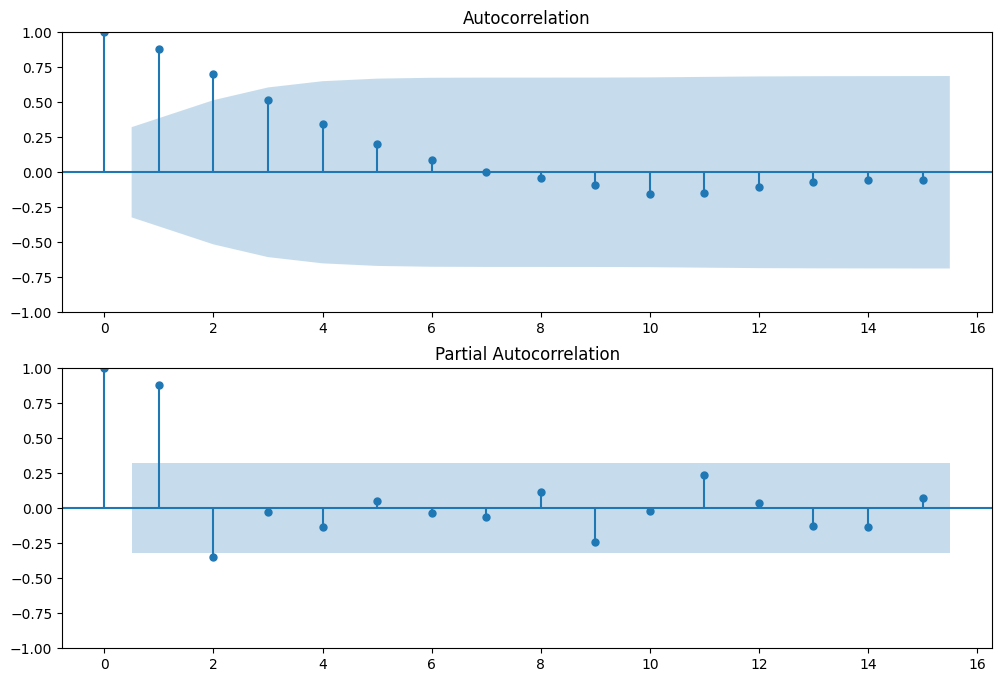

In [19]:
df2 = df.copy()
df2['valor_diff'] = df2['Population'].diff(1)
df2 = df2.dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['valor_diff'], lags=15, ax=ax1) #plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['valor_diff'], lags=15, ax=ax2) #plot de autocorrelación parcial

In [20]:
auto_arima_model = auto_arima(df['Population'], seasonal=False, stepwise=False, trace=True)
print(auto_arima_model.order)  # Suggested ARIMA order
print(auto_arima_model.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1353.989, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1357.674, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1352.280, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1346.630, Time=0.05 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1350.934, Time=0.36 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1348.844, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2164.317, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1708.131, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1673.396, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1725.124, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2355.935, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1728.975, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(3,1,0)(0,0,0)[0] i

In [21]:
arimaModel = ARIMA(df['Population'], order=(0, 1, 3),trend='t').fit()
print(arimaModel.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                   58
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -674.662
Date:                Thu, 20 Mar 2025   AIC                           1359.325
Time:                        17:12:26   BIC                           1369.540
Sample:                             0   HQIC                          1363.295
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.506e+04   2062.658     26.692      0.000     5.1e+04    5.91e+04
ma.L1          0.0107      0.011      0.975      0.329      -0.011       0.032
ma.L2          0.0169      0.016      1.089      0.2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [22]:
#creamos marcas a futuro
futuro=list(range(len(df),len(df)+6))

fig = go.Figure()
fig.add_trace(go.Scatter(y=df['Population'], mode='lines+markers', line=dict(color='black'), name='Serie'))
fig.add_trace(go.Scatter(x=futuro,y=arimaModel.forecast(6), mode='lines+markers', line=dict(color='blue'), name='Pronóstico'))

fig.show()

# Estacional

In [23]:
#leer los datos
!wget -O data.xlsx "https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/dataArima.xlsx"
df = pd.read_excel('data.xlsx') # cargar archivo de excel
print(df)


--2025-03-20 17:13:16--  https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/dataArima.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/dataArima.xlsx [following]
--2025-03-20 17:13:16--  https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/dataArima.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15023 (15K) [application/octet-stream]
Saving to: ‘data.xlsx’

data.xlsx           100%[===================>]  14.67K  --.-KB/s    in 0.001s  

2025-03-20 17:13:17 (10.6 MB/s) - ‘data.xlsx’ saved [1

In [24]:
#gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['valor'], mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

In [25]:
df2 = df.copy()
df2['dif1'] = df2['valor'].diff(1)
df2['dif1+12'] = df2['dif1'].diff(12)
df2 = df2.dropna()
fig = go.Figure()
fig.add_trace(go.Scatter(y=df2['dif1+12'], mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

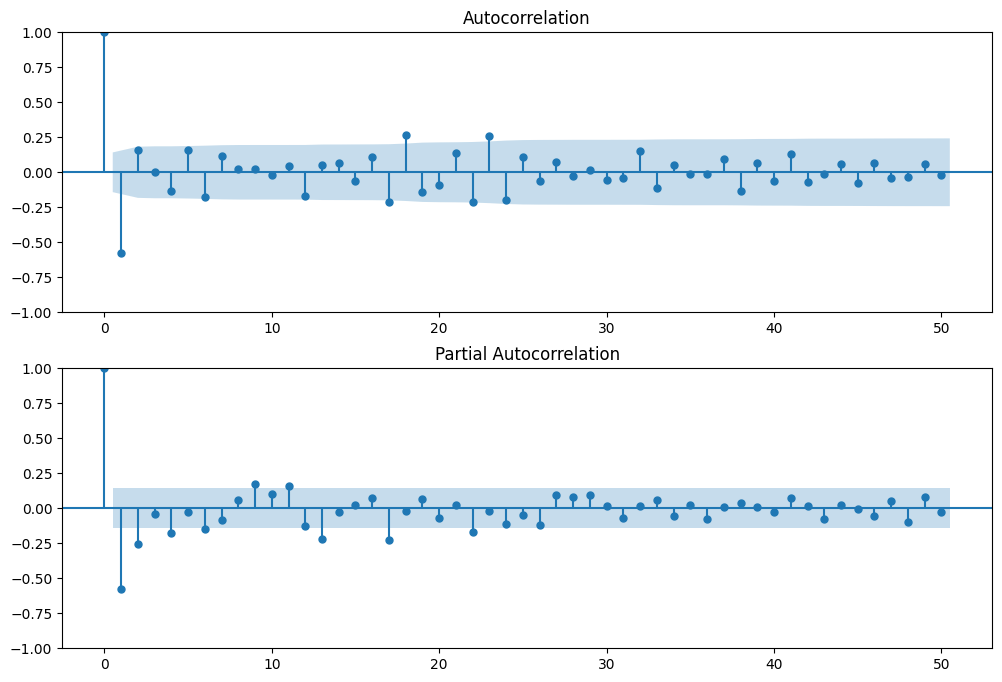

In [26]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['dif1+12'], lags=50, ax=ax1) #plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['dif1+12'], lags=50, ax=ax2) #plot de autocorrelación parcial

In [27]:
auto_arima_model = auto_arima(df['valor'], seasonal=True, stepwise=False, trace=True,m=12)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=659.245, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=634.870, Time=0.21 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=632.980, Time=0.62 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=650.810, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=635.068, Time=0.37 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=633.093, Time=1.03 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=633.294, Time=0.29 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=630.161, Time=0.79 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=6.77 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=557.316, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=529.539, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=531.512, Time=1.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=538.030, Time=0.21 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=531.524, Time=0.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=532.302, Time=1.80 sec
 ARIMA(0,1,1)(

In [28]:
print(auto_arima_model.order)  # imprimir coeficientes del modelo
print(auto_arima_model.summary())

(0, 1, 3)
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  204
Model:             SARIMAX(0, 1, 3)x(2, 1, [], 12)   Log Likelihood                -254.824
Date:                             Thu, 20 Mar 2025   AIC                            521.647
Time:                                     17:14:43   BIC                            541.161
Sample:                                          0   HQIC                           529.551
                                             - 204                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9904      0.052    -19.008      0.000      -1.093      -0.888
ma.L2          0.

In [29]:
#hacemos diferencia. (diferencia 1, sólo en el componente mes a mes)
arimaModel = ARIMA(df['valor'], order=(0, 1, 3),seasonal_order=(2,1,0,12)).fit()
print(arimaModel.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             valor   No. Observations:                  204
Model:             ARIMA(0, 1, 3)x(2, 1, [], 12)   Log Likelihood                -254.824
Date:                           Thu, 20 Mar 2025   AIC                            521.647
Time:                                   17:14:43   BIC                            541.161
Sample:                                        0   HQIC                           529.551
                                           - 204                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9904      0.052    -19.008      0.000      -1.093      -0.888
ma.L2          0.4470      0.076      5.855

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=arimaModel.resid.values, mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

In [31]:
#creamos marcas a futuro
futuro=list(range(len(df),len(df)+12))

fig = go.Figure()
fig.add_trace(go.Scatter(y=df['valor'], mode='lines+markers', line=dict(color='black'), name='Serie'))
fig.add_trace(go.Scatter(x=futuro,y=arimaModel.forecast(12), mode='lines+markers', line=dict(color='blue'), name='Pronóstico'))

fig.show()